In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)



# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import joblib
# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, 
                           balanced_accuracy_score, f1_score, precision_score, recall_score)
import warnings


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_iris
from scipy.stats import randint
warnings.filterwarnings('ignore')
import requests
import pathlib


### Preliminary Data Analysis and cleaning


In [103]:
# 1) Download , unzip and load the data folder
zip_file = r"https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
filename = "wine_file.zip"
try:
    response = requests.get(zip_file, stream=True)
    response.raise_for_status()
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{filename}' downloaded successfully.")
except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")
    








File 'wine_file.zip' downloaded successfully.


In [104]:
# After downloading, unzip the file
zipped_file = "wine_file.zip"
with zipfile.ZipFile(zipped_file, 'r') as zip_ref:
    zip_ref.printdir()



File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [105]:

with zipfile.ZipFile(zipped_file) as z:
    with z.open('winequality-white.csv') as f:
        white_wine = pd.read_csv(f,sep = ";")

In [106]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [107]:
# 2) Display the first 6 rows

white_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [108]:
# 3)check for missing values and handle them properly
white_wine.isna().sum()
                     #checked for missing values and handled properly

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [109]:
# 4) check for duplucates and Handle
duplicates=white_wine.duplicated().sum()

if duplicates >0:
    print(f"Removing {duplicates} duplicates rows....")
    white_wine=white_wine.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {white_wine.shape}")
else:
    print("✓ No duplicates to remove")


Removing 937 duplicates rows....
Dataset shape after removing duplicates: (3961, 12)


In [110]:
 #    Duplicates checked and handled properly
white_wine.duplicated().sum()
                #    Duplicates checked and handled properly

np.int64(0)

In [111]:
# # 5)check for data types and correct
#     checking for data type

white_wine.describe().T
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


### 6)provide a brief markdown summary of all dat and cleaning actions taken
 * 1. i displayed the first 6 rows and for the data cleaning 
 * 3. i chcked for missing values and cleaned missing values, 
 * 4. And i checked for the duplicates and drop the duplicates. 
 * 5. The type of datatype was checked it, which i observed that alll data are numerical or int

### 2.)Exploratory Data Analysis(EDA) and scaling

#### 2) Univariate analysis

In [112]:
white_wineEDA= white_wine.copy()
all_col= white_wineEDA.select_dtypes(include=['float64', 'int64']).columns

<function __main__.univariate_on_numerica_eda(all_col, col)>

Feature: fixed acidity

Skewness: 0.696


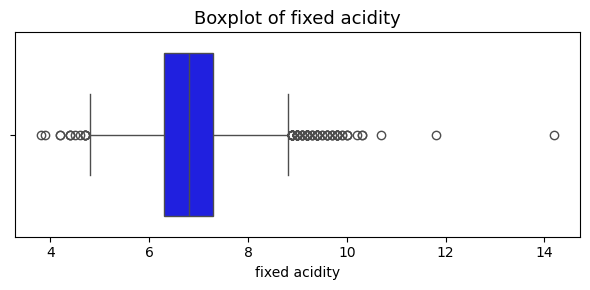

fixed acidity is moderately skewed.
Feature: volatile acidity

Skewness: 1.641


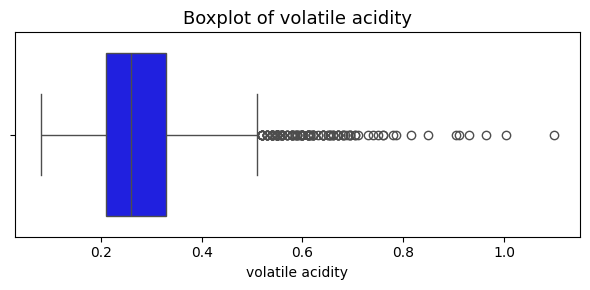


 volatile acidity is positively skew
Feature: citric acid

Skewness: 1.311


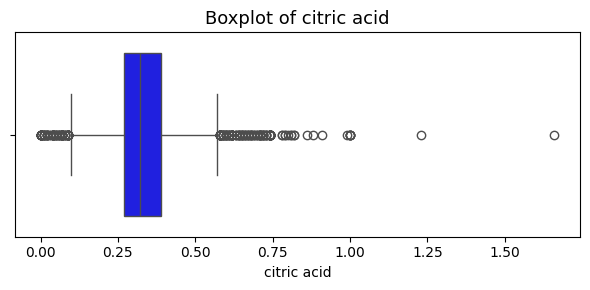


 citric acid is positively skew
Feature: residual sugar

Skewness: 1.334


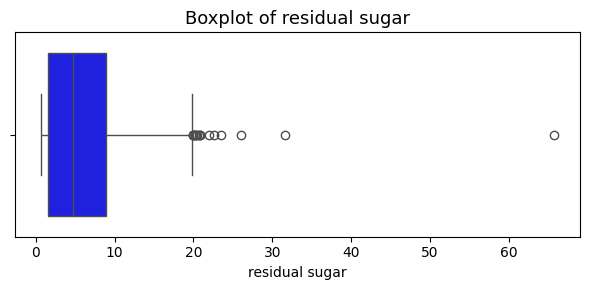


 residual sugar is positively skew
Feature: chlorides

Skewness: 4.969


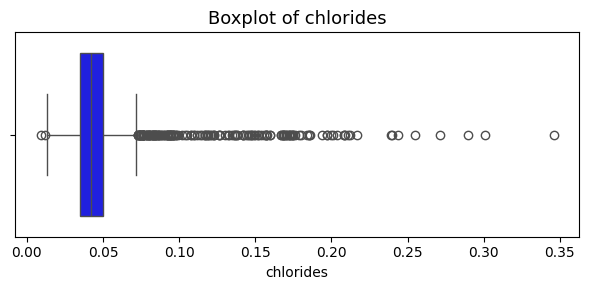


 chlorides is positively skew
Feature: free sulfur dioxide

Skewness: 1.567


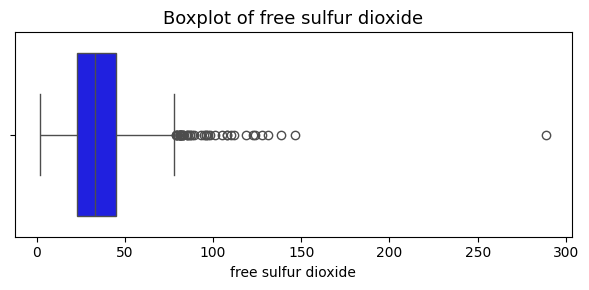


 free sulfur dioxide is positively skew
Feature: total sulfur dioxide

Skewness: 0.457


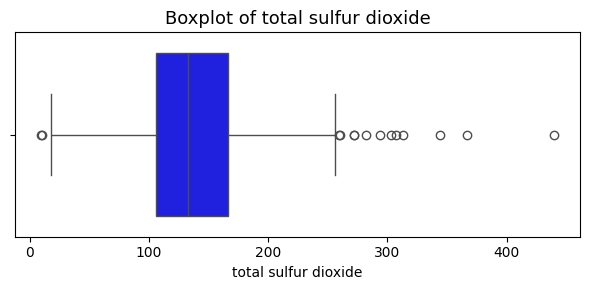

total sulfur dioxide is fairly symmetric.
Feature: density

Skewness: 1.273


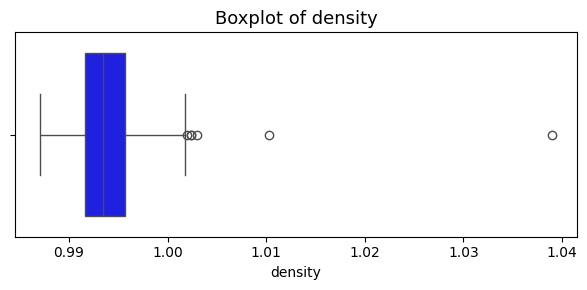


 density is positively skew
Feature: pH

Skewness: 0.455


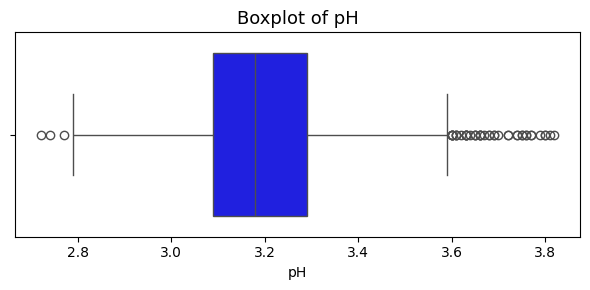

pH is fairly symmetric.
Feature: sulphates

Skewness: 0.938


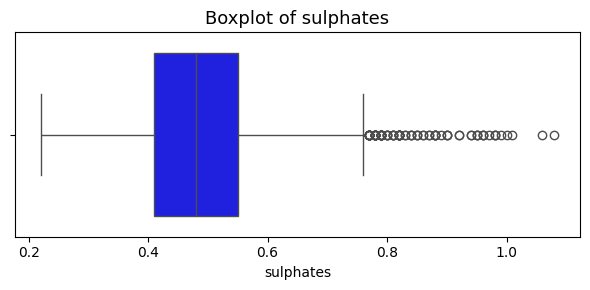

sulphates is moderately skewed.
Feature: alcohol

Skewness: 0.451


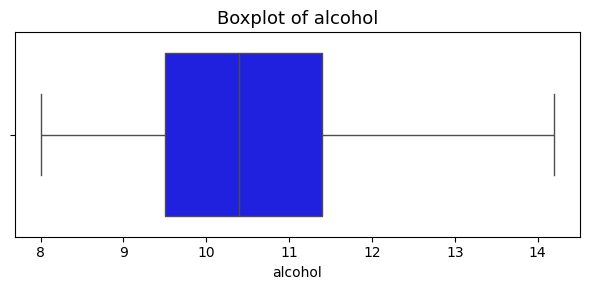

alcohol is fairly symmetric.
Feature: quality

Skewness: 0.112


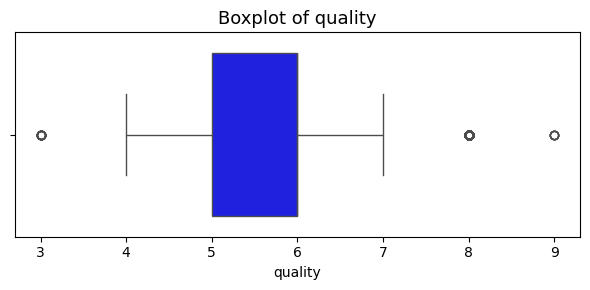

quality is fairly symmetric.


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_on_numerica_eda(white_wineEDA, all_col):
    for col in all_col:
        print(f"Feature: {col}")
        print("="*40)
        
        # checking forSkewness
        skew_value = white_wineEDA[col].skew()
        print(f"\nSkewness: {skew_value:.3f}")

        # Plot boxplot
        plt.figure(figsize=(6,3))
        sns.boxplot(x=white_wineEDA[col], color='blue')
        plt.title(f'Boxplot of {col}', fontsize=13)
        plt.tight_layout()
        plt.show()

        # Interpret skewness
        if abs(white_wineEDA[col].skew()) > 1:
             print(f"\n {col} is positively skew")
        elif abs(white_wineEDA[col].skew()) > 0.5:
            print(f"{col} is moderately skewed.")
        else:
            print(f"{col} is fairly symmetric.")
univariate_on_numerica_eda(white_wineEDA, all_col)


In [ ]:
# 2) Correlation with the target variables

In [ ]:
# 3) Map the quality column into categorical class 

white_wineEDA['quality']= white_wineEDA['quality'].map({9: 'Best', 8: 'Best', 7: 'Good', 6: 'Good', 5: 'Average', 4:'Bad', 3:'Bad'})

# 4) Ensure it is for all subsequent modelling steps

#5 split the dataset into features x and y
x= white_wineEDA.drop('quality', axis=1)
y=  white_wineEDA['quality']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, )


# 6) Apply appropriate scaling to all numerical
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range= (0,1))
x_scaled=scaler.fit_transform(x)  # Applied scaling to numerical
# 7)i did not perform feature enginerring

In [116]:
white_wineEDA.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good


In [117]:
white_build= white_wineEDA.copy

### 3) Build a Base Classification Model

Traininng model (LogisticRegression(),)
              precision    recall  f1-score   support

     Average       0.54      0.19      0.28       235
         Bad       0.00      0.00      0.00        42
        Best       0.00      0.00      0.00        35
        Good       0.63      0.94      0.76       481

    accuracy                           0.62       793
   macro avg       0.29      0.28      0.26       793
weighted avg       0.55      0.62      0.54       793

accuracy 0.6242118537200504


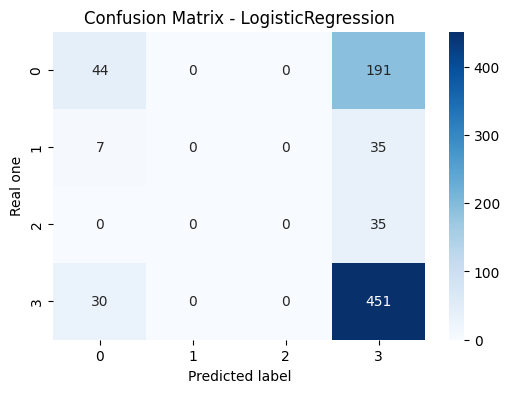

In [130]:
def build_baseline_model():
    models=LogisticRegression(),

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=234, max_iter=10)
    model.fit(x_train, y_train)
    print(f"Traininng model {models}")

    # predict model
    y_pred= model.predict(x_test)
    print(classification_report(y_test, y_pred))
    accuracy= accuracy_score(y_test, y_pred)
    print("accuracy", accuracy)

    # Confusion Matrix 
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - LogisticRegression")
    plt.xlabel("Predicted label")
    plt.ylabel("Real one")
    plt.show()


build_baseline_model()




In [ ]:
# 4) provide a short interpretation of what metrics mean 
"""
From the classification report result, our model is more predictive at quality ;good'with precision and f1_score at 0.63 and 0.74 respectively respectively, 
whille our model tends to be predictive at quality 'average'  at quality average with precision and f1 score around 0.54 and 0.28 respectively.
quality 'bad and best' tends to have lowest quality because both the f1 and precison tends towards zero.
both average and good tends to higher predictive value

"""
# i provided short interpretation



### 4 Build and compare Multiple Model

Traininng model Random Forest classifier
Random Forest classifier Matrics
Accuracy score: 0.712484237074401
Classification report: 
               precision    recall  f1-score   support

     Average       0.62      0.60      0.61       235
         Bad       0.67      0.05      0.09        42
        Best       1.00      0.06      0.11        35
        Good       0.75      0.87      0.81       481

    accuracy                           0.71       793
   macro avg       0.76      0.39      0.40       793
weighted avg       0.72      0.71      0.68       793



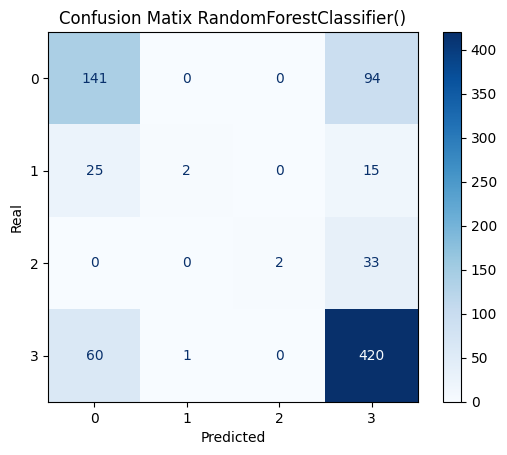

Traininng model Gradient bosying
Gradient bosying Matrics
Accuracy score: 0.7099621689785625
Classification report: 
               precision    recall  f1-score   support

     Average       0.61      0.58      0.60       235
         Bad       0.44      0.17      0.24        42
        Best       0.60      0.09      0.15        35
        Good       0.76      0.86      0.81       481

    accuracy                           0.71       793
   macro avg       0.60      0.43      0.45       793
weighted avg       0.69      0.71      0.69       793



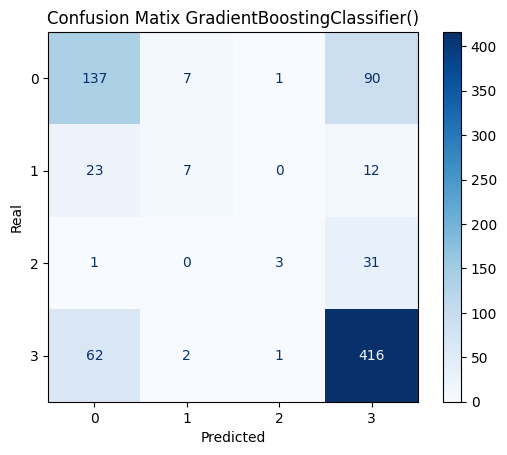

Traininng model Logistic Regression
Logistic Regression Matrics
Accuracy score: 0.648171500630517
Classification report: 
               precision    recall  f1-score   support

     Average       0.56      0.34      0.42       235
         Bad       0.00      0.00      0.00        42
        Best       0.00      0.00      0.00        35
        Good       0.67      0.90      0.77       481

    accuracy                           0.65       793
   macro avg       0.31      0.31      0.30       793
weighted avg       0.57      0.65      0.59       793



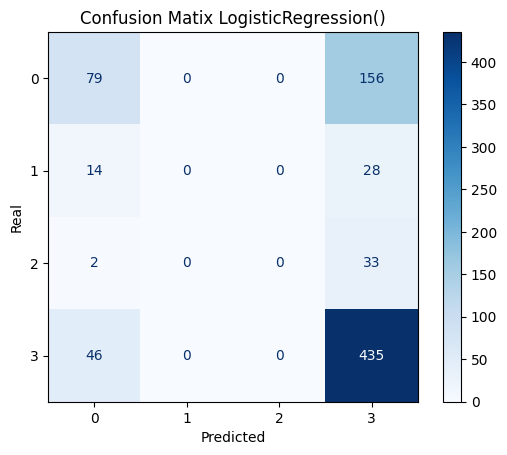

In [142]:
def build_and_compare():
    models={
        "Random Forest classifier": RandomForestClassifier(),
        # "DecisionTreeClassifier": DecisionTreeClassifier(),
        "Gradient bosying": GradientBoostingClassifier(),
         "Logistic Regression" : LogisticRegression()
    }
   #1 Traininfg at least three different classifications models

    for key, value in models.items():
        print(f"Traininng model {key}")
        value.fit(x_train, y_train)
        y_pred= value.predict(x_test)
        accuracy= accuracy_score(y_test, y_pred)
        # 2 Evaluation of each model using f1, precision and accuracy
        print(f"{key} Matrics")
        print(f"Accuracy score: {accuracy}")
        print(f"Classification report: \n {classification_report(y_test, y_pred)}")


        #confusion
        cm_matrix=confusion_matrix(y_test, y_pred)
        display= ConfusionMatrixDisplay(confusion_matrix=cm_matrix)

        display.plot(cmap= 'Blues')
        plt.title(f"Confusion Matix {value}")
        plt.ylabel("Real")
        plt.xlabel("Predicted")
        plt.show()


build_and_compare()

### 3) identify and justify which model performs better based on the balance ahese metrics

* According to the comparism of all three model metrics, random forest erformed better compared to all


### 5 optimization of Model using random search

In [ ]:
model = RandomForestClassifier(random_state=42)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 1) Retrain the model using optimal parameter

tune_grid = {

    "n_estimators":[50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}




random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,           
    cv=5,                  
    scoring='accuracy',    
    random_state=42,
    n_jobs=-1              
)

random_search.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=tune_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
    
)
random_search.fit(x_train, y_train)
print(f"Best parameters for random  {random_search.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random forest {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [157]:

Best_model= random_search.best_estimator_
cv_scores= cross_val_score(Best_model, x_scaled, y, cv=5)
print(f"Cross validation scoores for Random Forst: {cv_scores}")

Cross validation scoores for Random Forst: [0.66330391 0.67424242 0.7020202  0.68181818 0.69191919]


In [ ]:
#3) revaluation of the model using classification metrics

y_pred= Best_model.predict(x_test)
print("\n Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=1))


 Classification Report: 
              precision    recall  f1-score   support

     Average       0.61      0.60      0.61       235
         Bad       0.75      0.07      0.13        42
        Best       1.00      0.06      0.11        35
        Good       0.75      0.86      0.80       481

    accuracy                           0.71       793
   macro avg       0.78      0.40      0.41       793
weighted avg       0.72      0.71      0.68       793



In [ ]:
# 4)provide shord commentry on whether optimization improved

"""
i think optimization worked, because according to our new classification report all metrics increased in values. i feal that is good to substantiate my reason
"""

### 6.) Save Model and scaler

In [ ]:
### Saving

joblib.dump(Best_model, "Model.pki")  #save optimized model

### Saving standard scaler

joblib.dump(scaler, "scaler.pki")  #save the as scaler odel

print("Everything saved successfully")

Everything saved successfully
